In [18]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
#placeholders, will use input values from streamlit app
start_date = datetime.strptime("2024-01-01", "%Y-%m-%d").date()
end_date = datetime.strptime("2024-01-31", "%Y-%m-%d").date()

numerical_data = pd.read_csv("data/numerical_data.csv")
text_data = pd.read_csv("data/text_data.csv")
df = pd.read_csv("data/full_dataset.csv")

In [9]:
# clean data
numerical_data["Date"] = pd.to_datetime(numerical_data["Date"])
text_data["Date"] = pd.to_datetime(text_data["Date"])

In [12]:
def generate_template_summary(start_date, end_date, numerical_data, text_data):
    
    print(start_date, end_date)
    print(numerical_data.info())
    print(text_data.info())
    #put whatever stuff is good here. but actually do analysis below

generate_template_summary(start_date, end_date, numerical_data, text_data)

2024-01-01 2024-01-31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     487 non-null    datetime64[ns]
 1   Min Breathing Rate       399 non-null    float64       
 2   Max Breathing Rate       399 non-null    float64       
 3   Avg Breathing Rate       399 non-null    float64       
 4   Median Breathing Rate    399 non-null    float64       
 5   Min Heart Rate           447 non-null    float64       
 6   Max Heart Rate           447 non-null    float64       
 7   Avg Heart Rate           447 non-null    float64       
 8   Median Heart Rate        447 non-null    float64       
 9   Min Oxygen Level         261 non-null    float64       
 10  Max Oxygen Level         261 non-null    float64       
 11  Avg Oxygen Level         261 non-null    float64       
 12  Median Oxygen 

In [ ]:
correlation_matrix = numerical_data.corr()

#TODO: filter out comparisons that don't make sense, like min and max of the same variable
#then find top correlations and report and graph them
#would it be better to do this separately for min/max/avg
# or possibly use R
print(type(correlation_matrix))
print(correlation_matrix.head())


                           Date  Min Breathing Rate  Max Breathing Rate  \
Date                   1.000000           -0.035865            0.176275   
Min Breathing Rate    -0.035865            1.000000            0.143768   
Max Breathing Rate     0.176275            0.143768            1.000000   
Avg Breathing Rate     0.107038            0.653736            0.658413   
Median Breathing Rate  0.102363            0.471877            0.460672   

                       Avg Breathing Rate  Median Breathing Rate  \
Date                             0.107038               0.102363   
Min Breathing Rate               0.653736               0.471877   
Max Breathing Rate               0.658413               0.460672   
Avg Breathing Rate               1.000000               0.866996   
Median Breathing Rate            0.866996               1.000000   

                       Min Heart Rate  Max Heart Rate  Avg Heart Rate  \
Date                         0.135434        0.077842       -0.0981

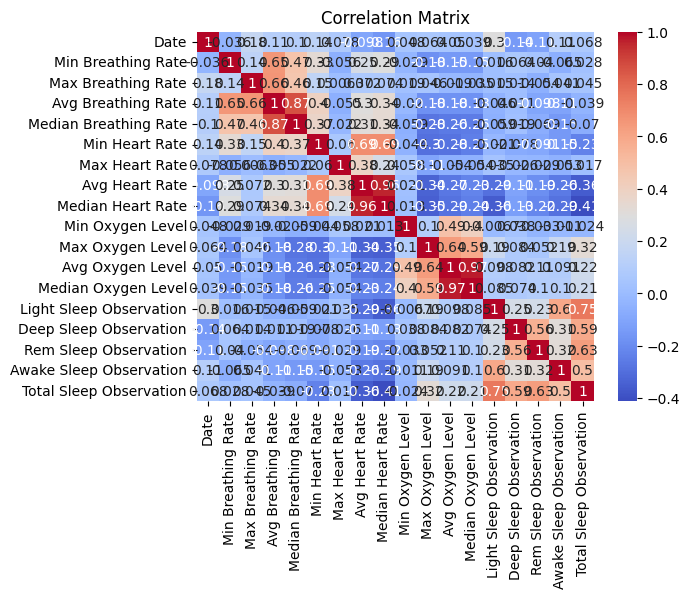

In [19]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

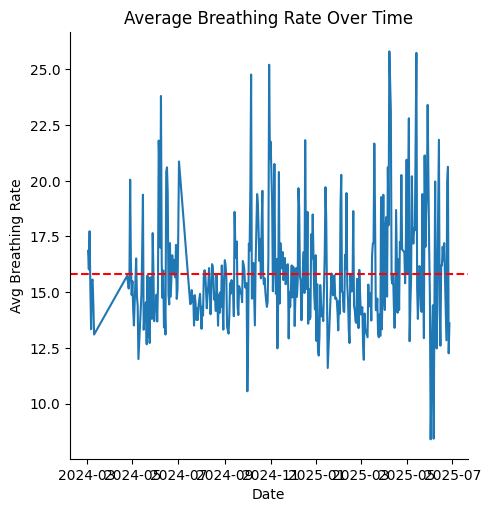

In [22]:
# will only be relevant if date range covers multiple days
sns.relplot(data = numerical_data, x="Date", y = "Avg Breathing Rate", kind = "line")
plt.title("Average Breathing Rate Over Time")
plt.axhline(y=numerical_data["Avg Breathing Rate"].mean(), color='r', linestyle='--', label='Mean Breathing Rate')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8953 entries, 0 to 8952
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8953 non-null   object 
 1   Description              8943 non-null   object 
 2   Is Important             8943 non-null   object 
 3   Time                     8943 non-null   object 
 4   Created By               8943 non-null   object 
 5   Category                 8943 non-null   object 
 6   Min Breathing Rate       7358 non-null   float64
 7   Max Breathing Rate       7358 non-null   float64
 8   Avg Breathing Rate       7358 non-null   float64
 9   Median Breathing Rate    7358 non-null   float64
 10  Min Heart Rate           7911 non-null   float64
 11  Max Heart Rate           7911 non-null   float64
 12  Avg Heart Rate           7911 non-null   float64
 13  Median Heart Rate        7911 non-null   float64
 14  Min Oxygen Level        